<a href="https://colab.research.google.com/github/angiecoronel12/Proyecto_AI_Accidents/blob/main/01_Accident_Severity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENTREGA 2 DEL PROYECTO IA

PREDICCIÓN DE LA SEVERIDAD DE UN ACCIDENTE DE TRÁNSITO EN FUNCIÓN DEL TIPO DE VEHÍCULO

Presentado por: 

LIZETH GIRALDO VELEZ
CC:1001237603

ANGIE LISETH CORONEL YELA 
CC: 108533329


## 1. EXPLORACIÓN DE LOS DATOS 

### 1.1 Carga de los datos desde Kaggle

In [ ]:
 !pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lizethgiraldovelez","key":"6229669b0ff403256c82a8cd6c8ebf5a"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d benoit72/uk-accidents-10-years-history-with-many-variables

 94% 97.0M/103M [00:00<00:00, 129MB/s]
100% 103M/103M [00:00<00:00, 125MB/s] 


In [ ]:
!unzip uk-accidents-10-years-history-with-many-variables;

Archive:  uk-accidents-10-years-history-with-many-variables.zip
  inflating: Accidents0514.csv       
  inflating: Casualties0514.csv      
  inflating: Road-Accident-Safety-Data-Guide.xls  
  inflating: Vehicles0514.csv        


In [ ]:
# Se importan las librerias necesarias para este trabajo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

### 1.2 Lectura y primer análisis de los Dataset

In [ ]:
#Cargar los datos
df_accidents = pd.read_csv("Accidents0514.csv")
df_accidents = df_accidents.copy()

df_vehicles = pd.read_csv("Vehicles0514.csv")
df_vehicles = df_vehicles.copy()

df_victims = pd.read_csv("Casualties0514.csv")
df_victims = df_victims.copy()

In [ ]:
df_accidents

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640592,2014984136414,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,...,0,0,6,3,3,0,0,2,1,NaN
1640593,2014984137514,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,...,0,0,6,1,3,0,0,2,1,NaN
1640594,2014984137714,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,...,0,0,4,1,4,0,0,2,1,NaN
1640595,2014984138414,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,...,0,0,6,2,2,0,0,2,1,NaN


In [ ]:
df_vehicles

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,9,0,18,0,0,0,0,0,...,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,1,11,0,4,0,3,0,0,0,...,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,1,11,0,17,0,0,0,4,0,...,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,2,9,0,2,0,0,0,0,0,...,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,1,9,0,18,0,0,0,0,0,...,1,15,2,49,8,1769,1,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004420,2014984138414,1,9,0,5,0,6,0,0,0,...,1,2,1,27,6,1781,1,12,6,1
3004421,2014984138414,2,19,0,18,0,1,1,4,7,...,1,2,1,44,7,1686,2,4,1,1
3004422,2014984138414,3,9,0,18,0,2,1,4,1,...,1,6,1,73,10,2143,2,-1,8,3
3004423,2014984139614,1,11,0,9,0,8,0,0,0,...,1,1,1,40,7,4500,2,4,-1,3


In [ ]:
df_victims

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2216715,2014984137714,1,1,2,2,16,4,3,0,0,2,0,0,9,1
2216716,2014984138414,1,1,1,1,27,6,3,0,0,0,0,0,9,1
2216717,2014984138414,2,2,1,1,44,7,2,0,0,0,0,0,19,1
2216718,2014984139614,1,2,2,1,61,9,3,0,0,0,4,0,11,2


### 1.3 Datos faltantes en cada uno de los datasets

Los datos faltantes en el dataset de estudio se encuentran reportados con un "-1"


In [ ]:
#Se muestran los datos faltantes del Dataset de accidents
for i in df_accidents.columns:

  Nan_accidents = str((df_accidents[i]==-1).sum())
  print(i + ': ' + Nan_accidents)

Accident_Index: 0
Location_Easting_OSGR: 0
Location_Northing_OSGR: 0
Longitude: 1
Latitude: 0
Police_Force: 0
Accident_Severity: 0
Number_of_Vehicles: 0
Number_of_Casualties: 0
Date: 0
Day_of_Week: 0
Time: 0
Local_Authority_(District): 0
Local_Authority_(Highway): 0
1st_Road_Class: 0
1st_Road_Number: 2
Road_Type: 0
Speed_limit: 0
Junction_Detail: 18
Junction_Control: 585322
2nd_Road_Class: 676268
2nd_Road_Number: 16118
Pedestrian_Crossing-Human_Control: 21
Pedestrian_Crossing-Physical_Facilities: 37
Light_Conditions: 0
Weather_Conditions: 161
Road_Surface_Conditions: 2155
Special_Conditions_at_Site: 18
Carriageway_Hazards: 32
Urban_or_Rural_Area: 0
Did_Police_Officer_Attend_Scene_of_Accident: 270
LSOA_of_Accident_Location: 0


In [ ]:
#Se muestran los datos faltantes del Dataset de vehicles
for j in df_vehicles.columns:

  Nan_vehicles = str((df_vehicles[j]==-1).sum())
  print(j + ': ' + Nan_vehicles)

Accident_Index: 0
Vehicle_Reference: 0
Vehicle_Type: 473
Towing_and_Articulation: 184
Vehicle_Manoeuvre: 1080
Vehicle_Location-Restricted_Lane: 74
Junction_Location: 9876
Skidding_and_Overturning: 132
Hit_Object_in_Carriageway: 87
Vehicle_Leaving_Carriageway: 127
Hit_Object_off_Carriageway: 54
1st_Point_of_Impact: 565
Was_Vehicle_Left_Hand_Drive?: 23049
Journey_Purpose_of_Driver: 44921
Sex_of_Driver: 33
Age_of_Driver: 330608
Age_Band_of_Driver: 330608
Engine_Capacity_(CC): 788471
Propulsion_Code: 770004
Age_of_Vehicle: 874989
Driver_IMD_Decile: 849921
Driver_Home_Area_Type: 588611


In [ ]:
#Se muestran los datos faltantes del Dataset de victims
for k in df_victims.columns:

  Nan_victims = str((df_victims[k]==-1).sum())
  print(k + ': ' + Nan_victims)

Accident_Index: 0
Vehicle_Reference: 0
Casualty_Reference: 0
Casualty_Class: 0
Sex_of_Casualty: 630
Age_of_Casualty: 45920
Age_Band_of_Casualty: 45920
Casualty_Severity: 0
Pedestrian_Location: 12
Pedestrian_Movement: 15
Car_Passenger: 404
Bus_or_Coach_Passenger: 38
Pedestrian_Road_Maintenance_Worker: 1439022
Casualty_Type: 0
Casualty_Home_Area_Type: 322715


## 2. Preprocesamiento de los datos

In [ ]:
#Se reemplazan los -1 por Nan

df_accidents.replace(-1,np.nan,inplace=True) 
df_vehicles.replace(-1,np.nan,inplace=True) 
df_victims.replace(-1,np.nan,inplace=True) 

### 2.1 Identificacion de las variables y sustitucion de los datos

**Variables numérica, se reemplazan los valores faltantes por el promedio .mean()**

In [ ]:
num_variables_accidents = ["Longitude", "1st_Road_Number", "Junction_Detail", "2nd_Road_Number"]
for i in num_variables_accidents:
  df_accidents[i] = df_accidents[i].fillna(df_accidents[i].mean()) 

In [ ]:
num_variables_victims = ["Age_of_Casualty", "Age_Band_of_Casualty"]
for i in num_variables_victims:
  df_victims[i] = df_victims[i].fillna(df_victims[i].mean())

**Variables categóricas, se reemplazan los valores faltantes por la moda .mode()**

In [ ]:
df_vehicles["Vehicle_Type"].value_counts() #Ver cantidad de datos de cada valor

9.0     2205201
1.0      184083
19.0     138182
5.0       86904
11.0      76888
3.0       70152
21.0      62962
8.0       52409
2.0       37224
4.0       25686
90.0      24305
20.0      22567
10.0       8387
17.0       6304
16.0       1297
22.0        459
98.0        387
97.0        286
18.0        250
23.0         19
Name: Vehicle_Type, dtype: int64

In [ ]:
cat_variables_accidents = ["Junction_Control", "2nd_Road_Class", "Pedestrian_Crossing-Human_Control", "Pedestrian_Crossing-Physical_Facilities","Weather_Conditions", "Road_Surface_Conditions", "Special_Conditions_at_Site", "Carriageway_Hazards", "Did_Police_Officer_Attend_Scene_of_Accident"]
for i in cat_variables_accidents:
  print(f" Mode : {df_accidents[i].mode()}")
  df_accidents[i] = df_accidents[i].fillna(df_accidents[i].mode().iloc[0]) #En caso de que la moda sean dos categorias se elije la primera

 Mode : 0    4.0
dtype: float64
 Mode : 0    6.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    1.0
dtype: float64
 Mode : 0    1.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    1.0
dtype: float64


In [ ]:
cat_variables_vehicles = ["Vehicle_Type", "Towing_and_Articulation", "Vehicle_Manoeuvre", "Vehicle_Location-Restricted_Lane", "Junction_Location", "Skidding_and_Overturning", "Hit_Object_in_Carriageway", "Vehicle_Leaving_Carriageway", "Hit_Object_off_Carriageway" , "1st_Point_of_Impact", "Was_Vehicle_Left_Hand_Drive?", "Journey_Purpose_of_Driver", "Sex_of_Driver", "Age_of_Driver", "Age_Band_of_Driver", "Engine_Capacity_(CC)", "Propulsion_Code", "Age_of_Vehicle", "Driver_IMD_Decile", "Driver_Home_Area_Type"]
for i in cat_variables_vehicles:
  print(f" Mode : {df_vehicles[i].mode()}")
  df_vehicles[i] = df_vehicles[i].fillna(df_vehicles[i].mode().iloc[0]) #En caso de que la moda sean dos categorias se elije la primera

 Mode : 0    9.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    18.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    1.0
dtype: float64
 Mode : 0    1.0
dtype: float64
 Mode : 0    15.0
dtype: float64
 Mode : 0    1.0
dtype: float64
 Mode : 0    30.0
dtype: float64
 Mode : 0    6.0
dtype: float64
 Mode : 0    1598.0
dtype: float64
 Mode : 0    1.0
dtype: float64
 Mode : 0    1.0
dtype: float64
 Mode : 0    3.0
dtype: float64
 Mode : 0    1.0
dtype: float64


In [ ]:
cat_variables_victims = ["Sex_of_Casualty", "Pedestrian_Location", "Pedestrian_Movement", "Car_Passenger", "Bus_or_Coach_Passenger", "Pedestrian_Road_Maintenance_Worker", "Casualty_Home_Area_Type"]
for i in cat_variables_victims:
  print(f" Mode : {df_victims[i].mode()}")
  df_victims[i] = df_victims[i].fillna(df_victims[i].mode().iloc[0]) #En caso de que la moda sean dos categorias se elije la primera

 Mode : 0    1.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    1.0
dtype: float64


## 3. Modelos e iteraciones 

### 3.1 Analisis de la variable objetivo

In [ ]:
sns.distplot(df_accidents['Accident_Severity'])

### 3.2 Generación tabla de variables finales de entrada y salida del modelo

In [ ]:
# df_victims[df_victims["Accident_Index"] == "20144100J0489"]
df_vehicles_cleaned = df_vehicles.groupby("Accident_Index").first().reset_index()
df_victims_cleaned = df_victims.groupby("Accident_Index").first().reset_index()

In [ ]:
print(df_accidents.shape)
print(df_victims_cleaned.shape)
print(df_vehicles_cleaned.shape)
# "Accident_Index"

(1640597, 32)
(1640597, 15)
(1640597, 22)


Unimos el dataset con la primary key "Accident_Index" y posteriormente se eliminan las variables que no son de interés 

In [ ]:
df_model_variables = df_accidents.merge(df_victims_cleaned,how="inner",on="Accident_Index").merge(df_vehicles_cleaned,how="inner",on="Accident_Index")

In [ ]:
df_model_variables.drop(['Accident_Index','Did_Police_Officer_Attend_Scene_of_Accident','Sex_of_Casualty',
                         'Sex_of_Driver','1st_Road_Class','2nd_Road_Number','Pedestrian_Crossing-Physical_Facilities',
                           'Casualty_Type','Pedestrian_Crossing-Human_Control','1st_Road_Number','Junction_Control',
                         'Bus_or_Coach_Passenger','Day_of_Week','Longitude','Was_Vehicle_Left_Hand_Drive?','Location_Easting_OSGR',
                         'Propulsion_Code','Vehicle_Location-Restricted_Lane','Journey_Purpose_of_Driver','Car_Passenger','Driver_IMD_Decile',
                         'Age_Band_of_Casualty','Age_Band_of_Driver','Latitude','Location_Northing_OSGR','Age_of_Driver','Age_of_Casualty',
                         'Local_Authority_(District)','Police_Force','Pedestrian_Movement','Casualty_Home_Area_Type','Pedestrian_Location',
                         'Casualty_Class','Driver_Home_Area_Type','2nd_Road_Class','Number_of_Vehicles','Light_Conditions',
                         'Vehicle_Leaving_Carriageway','Casualty_Reference','Number_of_Casualties','Pedestrian_Road_Maintenance_Worker',
                         'Local_Authority_(Highway)','Date','Time','LSOA_of_Accident_Location'],axis = 1,inplace=True)


### 3.3 División del dataset en Train & Test

Se divide el dataset con un 30% de los datos para validacion y 70% para entrenamiento

In [ ]:
y = df_model_variables['Accident_Severity'].values
X= df_model_variables.drop('Accident_Severity',axis=1)

test_size = 0.3
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=test_size,random_state=1)
print(X_train.shape, X_test.shape)

(1148417, 21) (492180, 21)


### 3.4 Aplicacion de los Metodos Supervisados

In [ ]:
estimator1 = LinearRegression()
estimator2 = DecisionTreeRegressor(max_depth=5)
estimator3 = RandomForestRegressor(n_estimators = 2,max_depth = 5)

In [ ]:
def report_cv_score(z):
    
    #RMSE en prueba y entrenamiento
    lr_ts_score = z['test_score']*(-1)
    lr_tr_score = z['train_score']*(-1)
    lin_rmse_ts = np.sqrt(lr_ts_score)
    lin_rmse_tr = np.sqrt(lr_tr_score)
    print("RMSLE Test: ", "{:.5f}".format(np.mean(lin_rmse_ts)), "(±", "{:.8f}".format(np.std(lin_rmse_ts)),")")
    print("RMSLE Train: ", "{:.5f}".format(np.mean(lin_rmse_tr)), "(±", "{:.8f}".format(np.std(lin_rmse_tr)),")")

In [ ]:
test_size = 0.3
val_size  = test_size/(1-test_size)
zscores = []
estimators = [estimator1, estimator2, estimator3]
for estimator in estimators:
    print("---------")
    z = cross_validate(estimator, X_train, y_train, return_train_score=True, return_estimator=False,
                       scoring="neg_mean_squared_error", cv=ShuffleSplit(n_splits=10, test_size= val_size))
    report_cv_score(z)
    zscores.append(np.mean(np.sqrt(z['test_score']*(-1))))
best = np.argmin(zscores)
print ("Seleccionado: ", best)
best_estimator = estimators[best]
print ("\n Mejor modelo: ")
print (best_estimator)

---------
RMSLE Test:  0.14096 (± 0.00069012 )
RMSLE Train:  0.14067 (± 0.00051694 )
---------
RMSLE Test:  0.14062 (± 0.00064850 )
RMSLE Train:  0.14045 (± 0.00048408 )
---------
RMSLE Test:  0.14050 (± 0.00071055 )
RMSLE Train:  0.14043 (± 0.00052810 )
Seleccionado:  2

 Mejor modelo: 
RandomForestRegressor(max_depth=5, n_estimators=2)


**Se aplica el mejor modelo obtenido para el estudio: Decision TreeRegressor**

In [ ]:
parametros = {'max_depth': [2,5,8,12,15]}


decission_tree = GridSearchCV(estimator = estimator2,
                        param_grid = parametros,
                        cv = ShuffleSplit(n_splits= 5, test_size=val_size), 
                        scoring = 'neg_mean_squared_error',
                        verbose = 1,
                        return_train_score = True,
                        n_jobs = -1)

decission_tree.fit(X_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=0.4285714285714286,
       train_size=None),
             estimator=DecisionTreeRegressor(max_depth=5), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 12, 15]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [ ]:
print("Mejor estimador Decision Tree: ",decission_tree.best_estimator_)
print("Mejores parámetros para el estimador Decision Tree: ", decission_tree.best_params_)

Mejor estimador Decision Tree:  DecisionTreeRegressor(max_depth=8)
Mejores parámetros para el estimador Decision Tree:  {'max_depth': 8}


In [ ]:
Des_tree = DecisionTreeRegressor(max_depth=8)
Des_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [ ]:
#Función para calcular el RMSLE de los modelos implementados
from sklearn.metrics import mean_squared_error
def RMSLE(y_actual, y_pred):
    
    return np.sqrt(mean_squared_error(y_actual, y_pred))

In [ ]:
#Resultado del RMSLE para el mejor modelo obtenido
print('RMSLE del Decision Tree en entrenamiento: ',"{:.5f}".format(RMSLE((y_train) , (Des_tree.predict(X_train)))))
print('RMSLE del Decision Tree seleccionado: ',"{:.5f}".format(RMSLE(y_test , Des_tree.predict(X_test))))

RMSLE del Decision Tree en entrenamiento:  0.14001
RMSLE del Decision Tree seleccionado:  0.14042


**Se anexa el analisis de la correlacion entre las variables **

In [ ]:
#funcion de correlacion de las variables
corr_matrix_train = df_model_variables.corr()

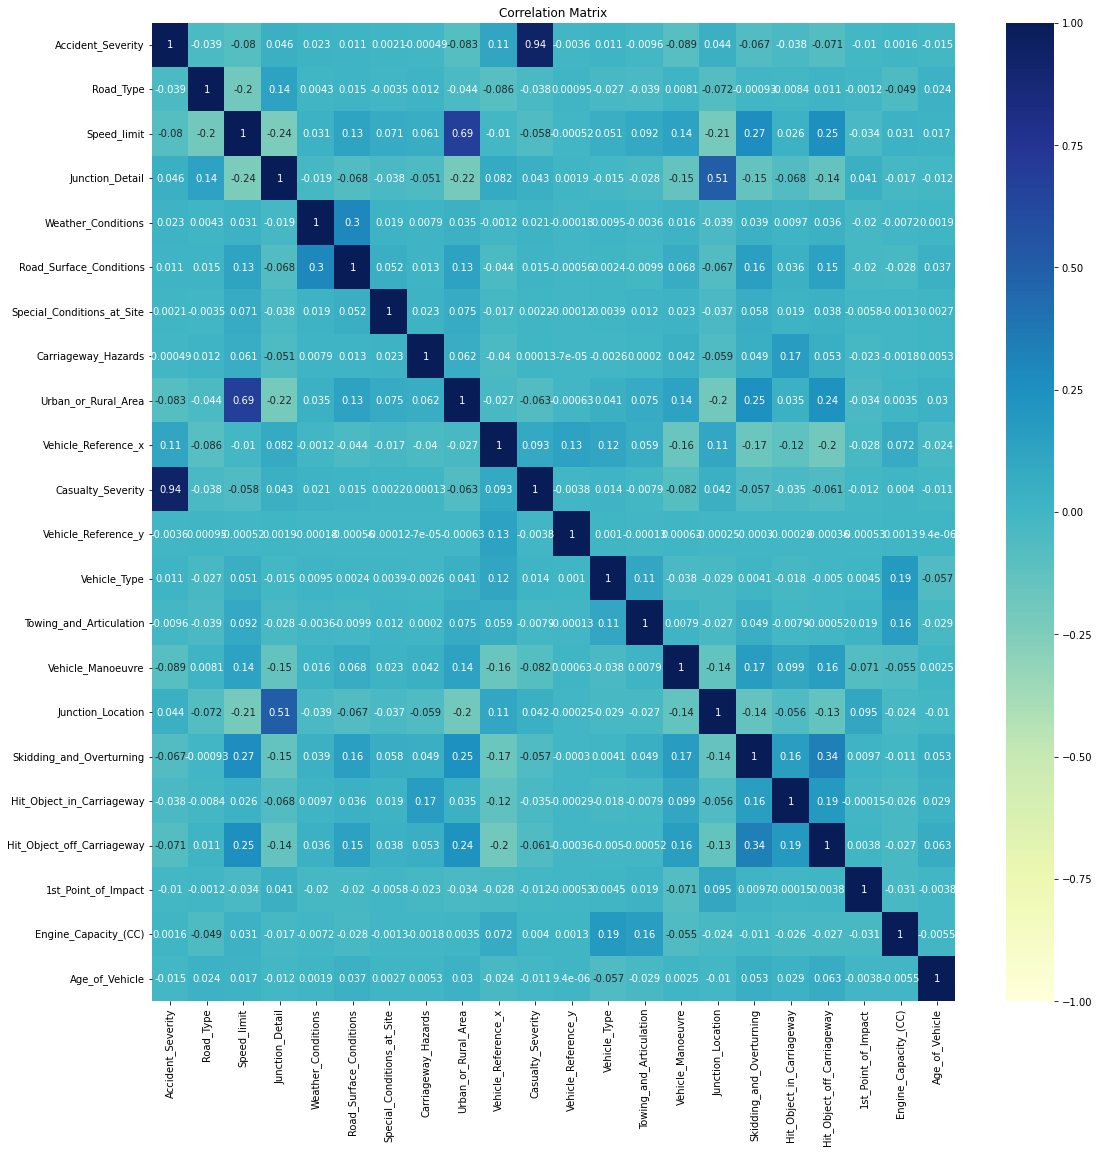

In [ ]:
#Gráfico de la matriz de correlaciones
plt.figure(figsize=(18,18))
sns.heatmap(corr_matrix_train, annot = True, vmin = -1, vmax = 1, cmap = "YlGnBu").set_title('Correlation Matrix')
plt.show()

In [ ]:
#Correlaciones de las variables con la variable objetivo
target_corr_df = pd.DataFrame(corr_matrix_train["Accident_Severity"].sort_values(ascending=False))
target_corr_df 

,Accident_Severity
Accident_Severity,1.000000
Casualty_Severity,0.935797
Vehicle_Reference_x,0.110146
Junction_Detail,0.045987
Junction_Location,0.043687
Weather_Conditions,0.022580
Vehicle_Type,0.011229
Road_Surface_Conditions,0.011197
Special_Conditions_at_Site,0.002063
Engine_Capacity_(CC),0.001557
